In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL.Image as Image

from scipy.fft import fft2
from scipy.fft import ifft2

np.random.seed(42)

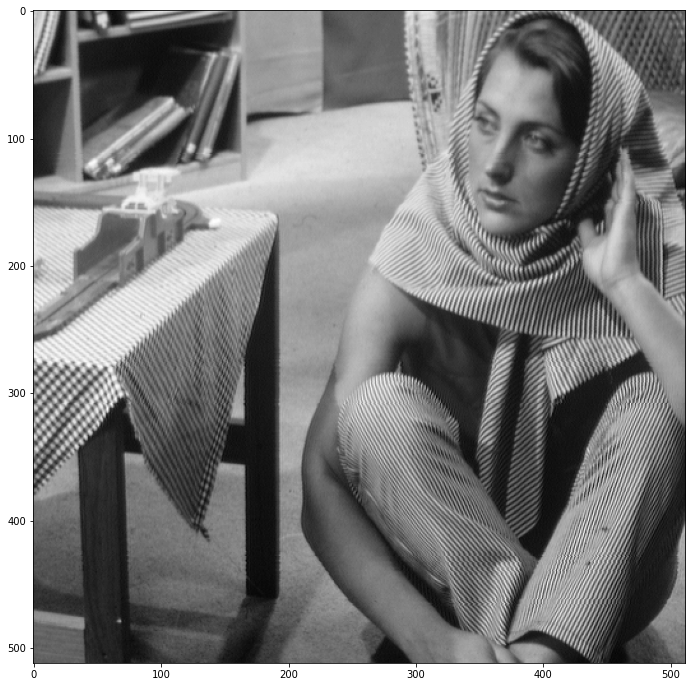

In [22]:
os.chdir('/content/drive/MyDrive/DIP_Ass4')
barbara = np.array(Image.open('x5.bmp'))

plt.figure(figsize=(12,12))
plt.imshow(barbara, cmap='gray')

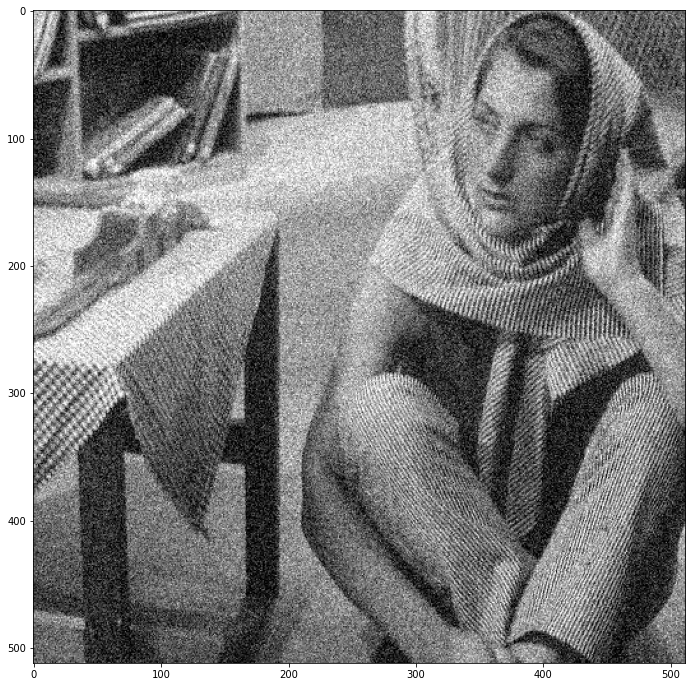

In [23]:
variance = 30
awgn = np.random.normal(0, variance, barbara.shape)

barbara_noisy = barbara.copy().astype(np.float64)
barbara_noisy += awgn

barbara_noisy = np.clip(barbara_noisy, 0, 255)

plt.figure(figsize=(12,12))
plt.imshow(barbara_noisy, cmap='gray')

In [24]:
laplacian = np.array([[-1,-1,-1],
[-1,8,-1],
[-1,-1,-1]])

padded_tuple = (barbara_noisy.shape[0]*2, barbara_noisy.shape[1]*2)

G = fft2(barbara_noisy, padded_tuple)
H = np.ones(padded_tuple) #since we did not add any degradation noise
L = fft2(laplacian, padded_tuple)

Best PSNR: 24.069107797105236 
K: 0.001 
Gamma: 0.06


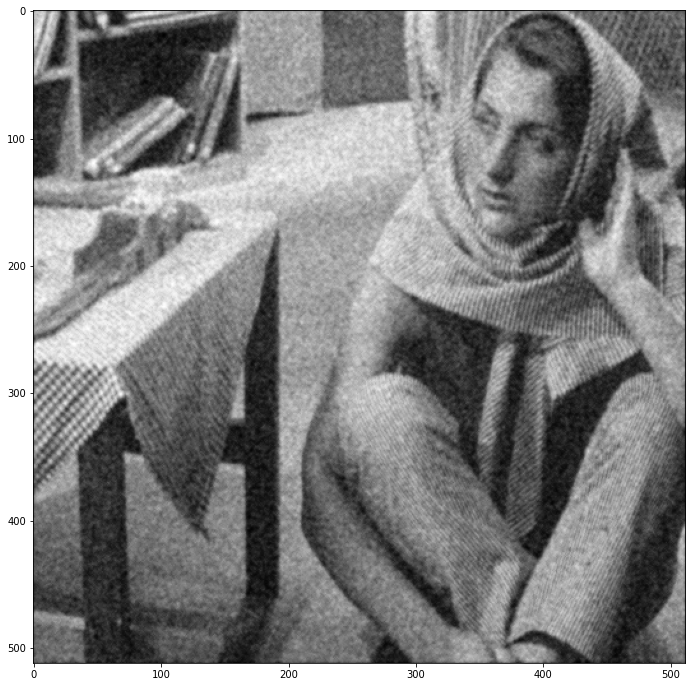

In [25]:
psnr_original_max, K_max, gamma_max = float('-inf'), None, None

for pow_k in range(0,9):
    K = pow_k*0.001
    for pow_gamma in range(0, 9):
        gamma = pow_gamma*0.01
        W = np.conjugate(H)/((np.square(np.abs(H))+K)*(1+gamma*np.square(np.abs(L))))
        F = W*G
        barbara_denoised = np.clip(ifft2(F).real[:barbara_noisy.shape[0], :barbara_noisy.shape[1]],0, 255)
        psnr_original = 10*np.log10(255**2/np.mean(np.square(barbara_denoised-barbara)))

        if psnr_original > psnr_original_max:
            psnr_original_max = psnr_original
            K_max = K
            gamma_max = gamma

W = np.conjugate(H)/((np.square(np.abs(H))+K_max)*(1+gamma_max*np.square(np.abs(L))))
F = W*G
barbara_denoised = np.clip(ifft2(F).real[:barbara_noisy.shape[0], :barbara_noisy.shape[1]],0, 255)
psnr_original_max = 10*np.log10(255**2/np.mean(np.square(barbara_denoised-barbara)))

print("Best PSNR:", psnr_original_max, "\nK:",K_max,"\nGamma:", gamma_max)

plt.figure(figsize=(12,12))
plt.imshow(barbara_denoised, cmap='gray')

Wiener PSNR: 18.804646600639707 
K: 0.001


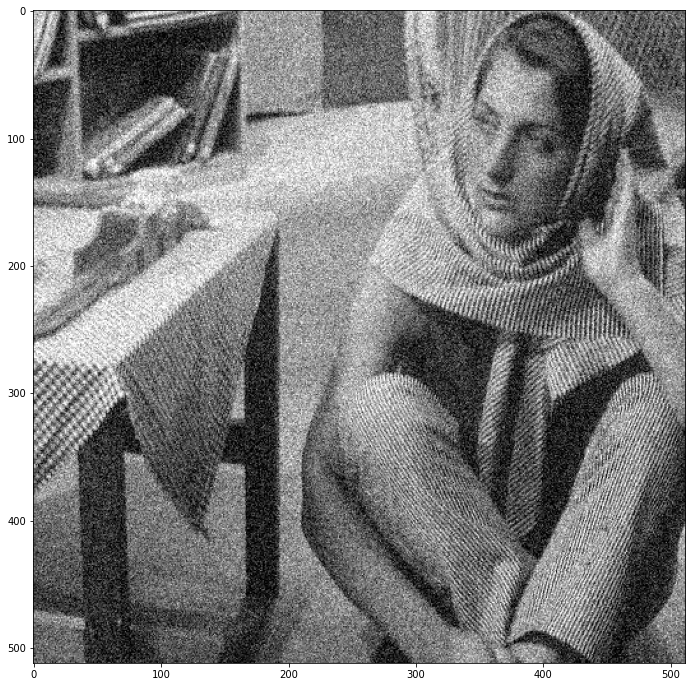

In [26]:
W = np.conjugate(H)/(np.square(np.abs(H))+K_max)
F = W*G
barbara_denoised_wiener = np.clip(ifft2(F).real[:barbara_noisy.shape[0], :barbara_noisy.shape[1]],0, 255)
psnr_original_wiener = 10*np.log10(255**2/np.mean(np.square(barbara_denoised_wiener-barbara)))

print("Wiener PSNR:", psnr_original_wiener, "\nK:", K_max)

plt.figure(figsize=(12,12))
plt.imshow(barbara_denoised_wiener, cmap='gray')

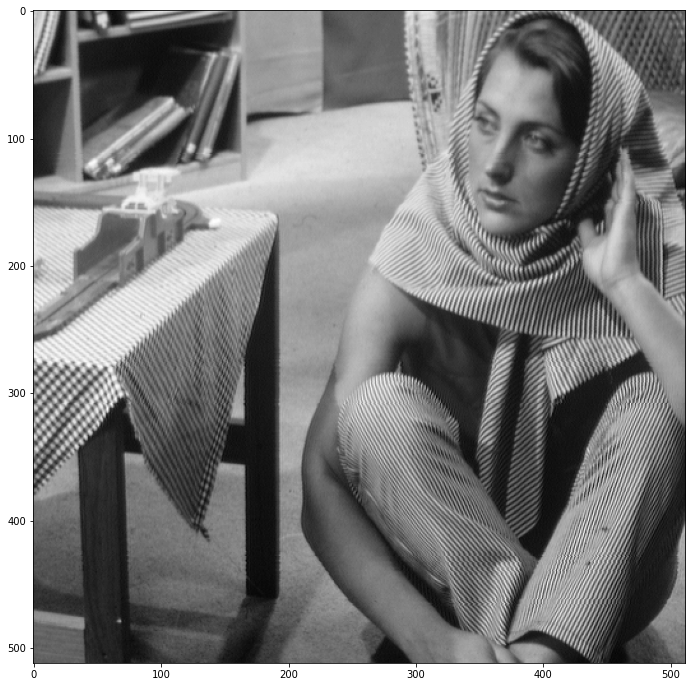

In [27]:
import scipy.ndimage as nd

plt.figure(figsize=(12,12))
plt.imshow(barbara, cmap='gray')

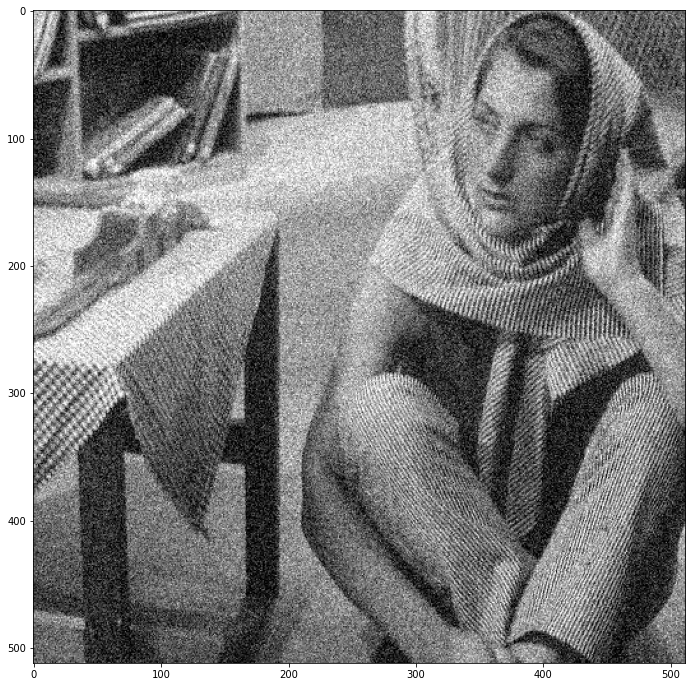

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(barbara_noisy, cmap='gray')

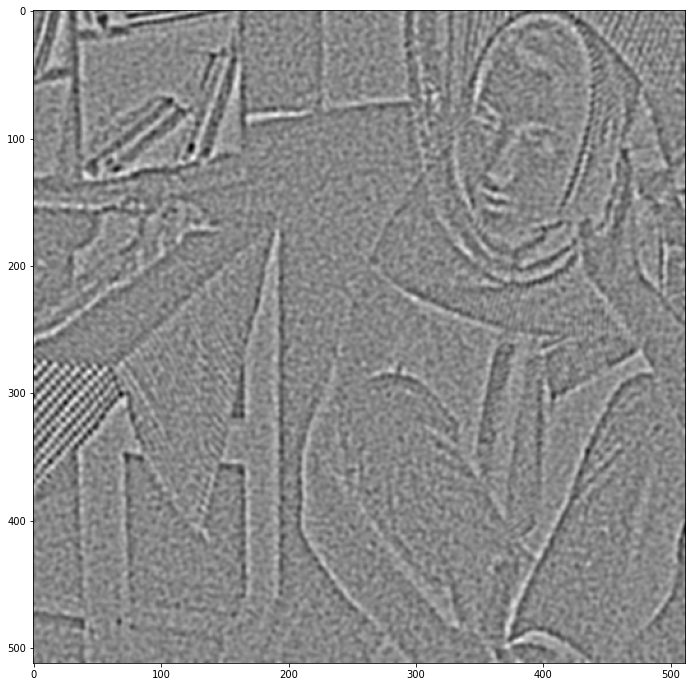

In [29]:
LoG = nd.gaussian_laplace(barbara_noisy, 2)

plt.figure(figsize=(12,12))
plt.imshow(LoG, cmap='gray')

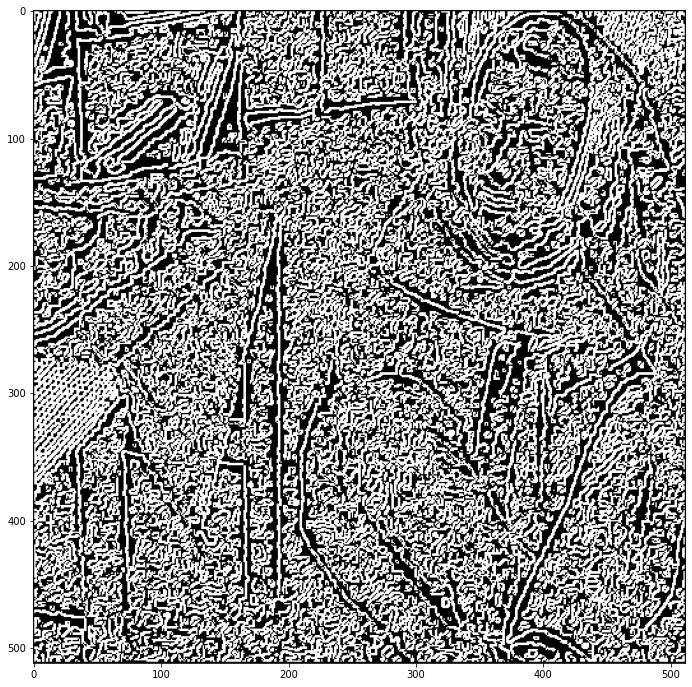

In [30]:
thresh = np.abs(np.amax(LoG))*0.04
zero_crossing = np.zeros(barbara.shape)
for i in range(1,barbara.shape[0]-1):
    for j in range(1, barbara.shape[1]-1):
        wdw = LoG[i-1:i+2, j-1:j+2]
        if wdw[0,0]*wdw[2,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh:
            zero_crossing[i,j] = 1
        if wdw[0,1]*wdw[2,1] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh:
            zero_crossing[i,j] = 1
        if wdw[1,0]*wdw[1,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh:
            zero_crossing[i,j] = 1
        if wdw[2,0]*wdw[0,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh:
            zero_crossing[i,j] = 1

plt.figure(figsize=(12,12))
plt.imshow(zero_crossing, cmap='gray')

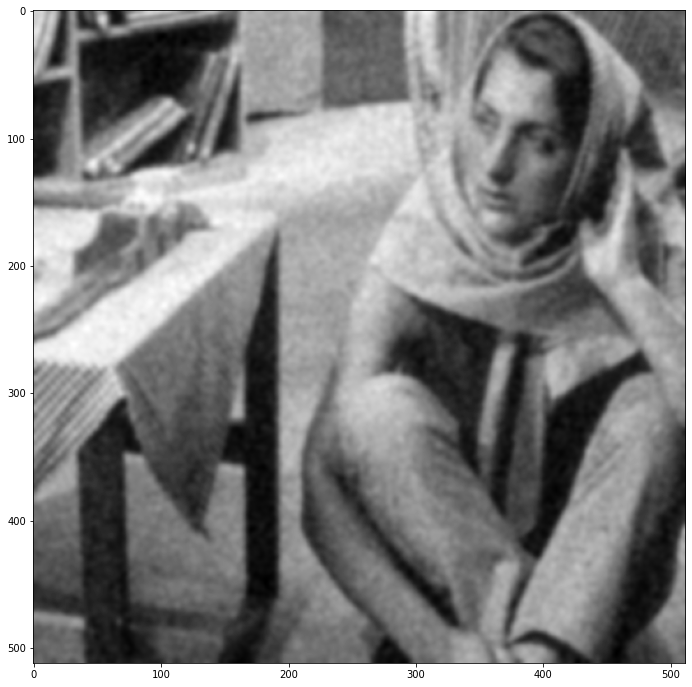

In [31]:
from scipy.ndimage import gaussian_filter

barbara_gaussian = gaussian_filter(barbara_noisy, sigma=2)
plt.figure(figsize=(12,12))
plt.imshow(barbara_gaussian, cmap='gray')

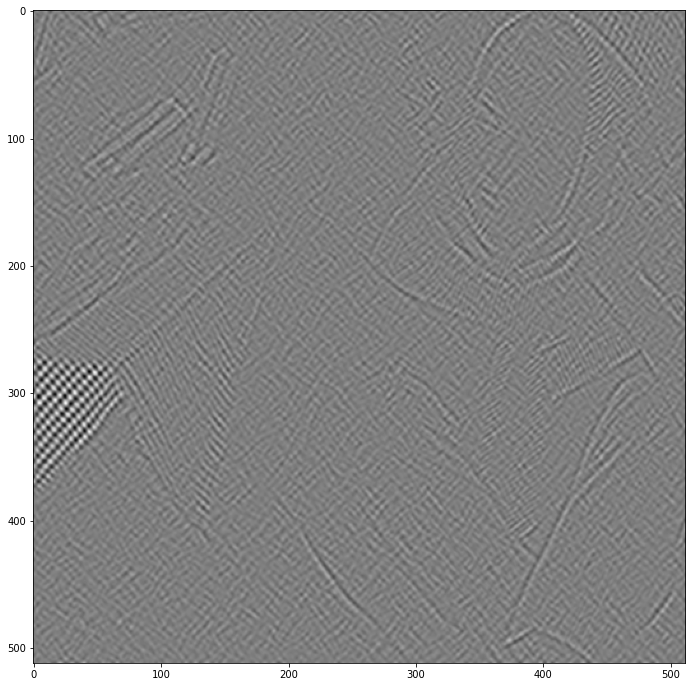

In [32]:
barbara_gaussian_2D = gaussian_filter(barbara_noisy, sigma=2, order=2)
plt.figure(figsize=(12,12))
plt.imshow(barbara_gaussian_2D, cmap='gray')

In [33]:
print("Sum of absolute difference of LoG and 2D gauss filter", np.sum(np.abs(barbara_gaussian_2D-LoG)))

Sum of absolute difference of LoG and 2D gauss filter 546444.3798519011


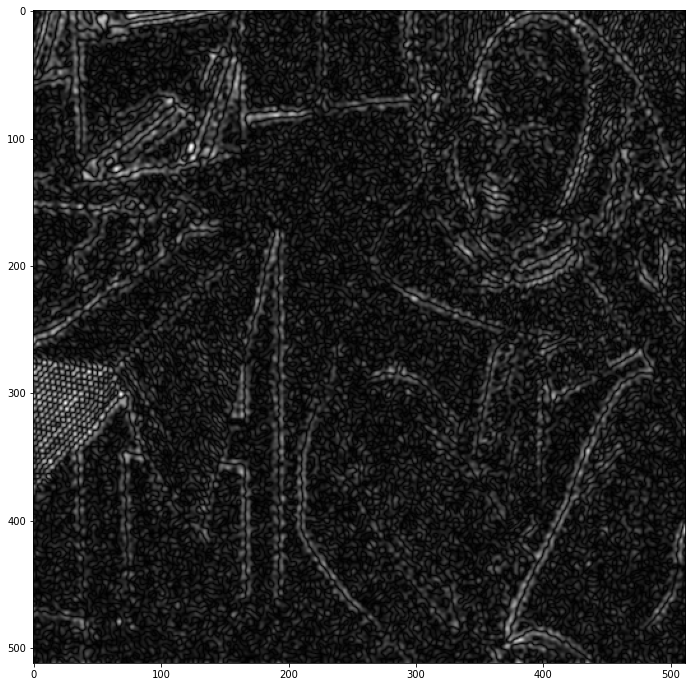

In [34]:
difference_array = np.abs(barbara_gaussian_2D-LoG)
plt.figure(figsize=(12,12))
plt.imshow(((difference_array-np.amin(difference_array)/np.amax(difference_array)))*255, cmap='gray')

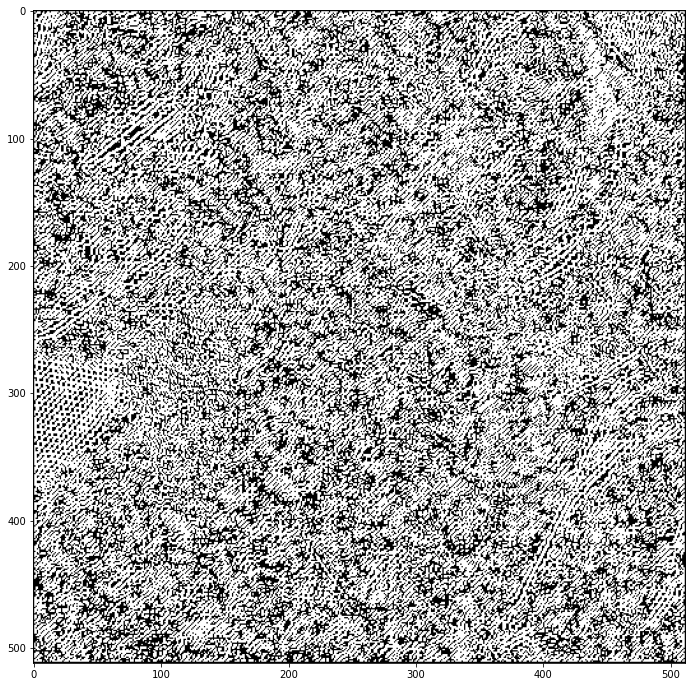

In [35]:
thresh_2D = np.abs(np.amax(barbara_gaussian_2D))*0.04
zero_crossing_2D = np.zeros(barbara.shape)
for i in range(1,barbara.shape[0]-1):
    for j in range(1, barbara.shape[1]-1):
        wdw = barbara_gaussian_2D[i-1:i+2, j-1:j+2]
        if wdw[0,0]*wdw[2,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh_2D:
            zero_crossing_2D[i,j] = 1
        if wdw[0,1]*wdw[2,1] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh_2D:
            zero_crossing_2D[i,j] = 1
        if wdw[1,0]*wdw[1,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh_2D:
            zero_crossing_2D[i,j] = 1
        if wdw[2,0]*wdw[0,2] < 0 and np.abs(wdw[0,0]-wdw[2,2]) > thresh_2D:
            zero_crossing_2D[i,j] = 1

plt.figure(figsize=(12,12))
plt.imshow(zero_crossing_2D, cmap='gray')